<a href="https://colab.research.google.com/github/BadikeRaju/CPU-vs-GPU/blob/main/GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install transformers torch onnx onnxruntime opencv-python psutil scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.4 MB/s eta 0:00:00


In [ ]:

from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch
import time
import cv2
import psutil
from sklearn.metrics import accuracy_score
import onnxruntime as ort
import numpy as np
import matplotlib.pyplot as plt
import threading
import subprocess
import os
from google.colab import files

In [ ]:

from google.colab import files

uploaded = files.upload()

import io
import os

video_filename = list(uploaded.keys())[0]
print(f"Uploaded video file: {video_filename}")


Saving bottle-detection.mp4 to bottle-detection (1).mp4
Uploaded video file: bottle-detection (1).mp4


In [ ]:

model_name = "google/vit-base-patch16-224-in21k"

model = AutoModelForImageClassification.from_pretrained(model_name)
extractor = AutoFeatureExtractor.from_pretrained(model_name)

device = torch.device('cuda')
model = model.to(device)
model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:

video_path = "/content/bottle-detection.mp4"


cap = cv2.VideoCapture(video_path)

start_time = time.time()
num_frames = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    num_frames += 1

    input_data = extractor(frame, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**input_data)


    if num_frames % 10 == 0:
        elapsed_time = time.time() - start_time
        fps = num_frames / elapsed_time
        print(f"FPS (GPU): {fps:.2f}")

cap.release()


FPS (GPU): 8.90
FPS (GPU): 15.63
FPS (GPU): 21.23
FPS (GPU): 25.84
FPS (GPU): 29.57
FPS (GPU): 32.88
FPS (GPU): 35.68
FPS (GPU): 38.09
FPS (GPU): 40.26
FPS (GPU): 42.18
FPS (GPU): 43.85
FPS (GPU): 45.40
FPS (GPU): 46.79
FPS (GPU): 48.05
FPS (GPU): 49.10
FPS (GPU): 50.20
FPS (GPU): 51.17
FPS (GPU): 51.97
FPS (GPU): 52.82
FPS (GPU): 53.58
FPS (GPU): 54.28
FPS (GPU): 54.92
FPS (GPU): 55.51
FPS (GPU): 56.09
FPS (GPU): 56.60
FPS (GPU): 57.12
FPS (GPU): 57.62
FPS (GPU): 58.08
FPS (GPU): 58.50
FPS (GPU): 58.83
FPS (GPU): 59.23
FPS (GPU): 59.61
FPS (GPU): 59.94
FPS (GPU): 60.29
FPS (GPU): 60.57
FPS (GPU): 60.88
FPS (GPU): 61.12
FPS (GPU): 61.37
FPS (GPU): 61.63
FPS (GPU): 61.89
FPS (GPU): 62.12
FPS (GPU): 62.35
FPS (GPU): 62.56
FPS (GPU): 62.77
FPS (GPU): 62.91
FPS (GPU): 63.08
FPS (GPU): 63.28
FPS (GPU): 63.45
FPS (GPU): 63.61
FPS (GPU): 63.77
FPS (GPU): 63.93
FPS (GPU): 64.09
FPS (GPU): 64.20
FPS (GPU): 64.35
FPS (GPU): 64.48
FPS (GPU): 64.64
FPS (GPU): 64.77
FPS (GPU): 64.90
FPS (GPU): 65.0

In [ ]:

ground_truth_labels = [
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 1-10
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 11-20
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 21-30
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 31-40
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 41-50
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 51-60
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 61-70
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 71-80
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 81-90
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 91-100
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 101-110
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 111-120
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 121-130
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 131-140
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 141-150
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 151-160
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 161-170
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 171-180
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 181-190
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 191-200
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 201-210
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 211-220
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 221-230
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 231-240
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 241-250
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 251-260
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 261-270
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 271-280
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 281-290
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 291-300
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 1-10
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 11-20
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 21-30
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 31-40
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 41-50
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 51-60
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 61-70
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 71-80
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 81-90
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 91-100
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 101-110
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 111-120
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 121-130
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 131-140
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 141-150
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 151-160
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 161-170
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 171-180
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 181-190
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 191-200
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 201-210
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 211-220
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 221-230
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 231-240
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 241-250
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 251-260
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 261-270
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 271-280
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 281-290
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 291-300
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 1-10
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 11-20
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 21-30
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 31-40
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 41-50
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 51-60
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 61-70
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 71-80
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 81-90
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 91-100
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 101-110
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 111-120
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 121-130
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 131-140
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 141-150
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 151-160
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 161-170
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 171-180
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 181-190
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 191-200
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 201-210
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 211-220
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 221-230
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 231-240
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 241-250
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 251-260
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 261-270
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 271-280
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 281-290
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 291-300
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 1-10
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 11-20
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 21-30
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 31-40
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 41-50
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 51-60
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 61-70
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 71-80
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 81-90
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 91-100
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 101-110
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 111-120
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 121-130
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 131-140
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 141-150
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 151-160
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 161-170
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 171-180
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 181-190
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 191-200
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 1-10
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 11-20
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 21-30
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 31-40
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 41-50
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 51-60
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 61-70
    0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # 71-80
    0, 1, 2, 1, 0, 1, 2, 1, 0,  # 81-90

]




assert len(ground_truth_labels) == 1189, f"Expected 1189 labels, but got {len(ground_truth_labels)}"
print(f"Total ground truth labels: {len(ground_truth_labels)}")


Total ground truth labels: 1189


In [ ]:
def track_cpu_usage(interval=0.1, usage_list=None, stop_event=None):
    """
    Tracks CPU usage at specified intervals and appends to usage_list.
    """
    while not stop_event.is_set():
        cpu = psutil.cpu_percent(interval=interval)
        usage_list.append(cpu)


In [ ]:
def track_gpu_usage(interval=0.1, usage_list=None, stop_event=None):
    """
    Tracks GPU usage at specified intervals and appends to usage_list.
    """
    while not stop_event.is_set():
        # Run nvidia-smi command to get GPU utilization and memory usage
        try:
            result = subprocess.check_output(
                [
                    "nvidia-smi",
                    "--query-gpu=utilization.gpu,memory.used,memory.total",
                    "--format=csv,noheader,nounits"
                ]
            )
            result = result.decode('utf-8').strip().split(',')
            if len(result) >= 2:
                gpu_util = float(result[0])
                mem_used = float(result[1])
                usage_list.append(gpu_util)
            else:
                usage_list.append(0)
        except Exception as e:
            usage_list.append(0)
        time.sleep(interval)


In [ ]:

model_name = "google/vit-base-patch16-224-in21k"

model = AutoModelForImageClassification.from_pretrained(model_name)
extractor = AutoFeatureExtractor.from_pretrained(model_name)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def process_video(device, video_path, ground_truth_labels, output_video_path):
    """
    Processes the video on the specified device (GPU/CPU).
    Returns predicted labels, accuracy, FPS, and resource usage.
    Saves an annotated video with predictions.
    """

    model = AutoModelForImageClassification.from_pretrained(model_name).to(device)
    model.eval()
    extractor = AutoFeatureExtractor.from_pretrained(model_name)


    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video file {video_path}")


    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    predicted_labels = []
    frame_count = 0


    cpu_usage = []
    gpu_usage = []
    stop_event = threading.Event()


    cpu_thread = threading.Thread(target=track_cpu_usage, args=(0.1, cpu_usage, stop_event))
    cpu_thread.start()


    if device.type == 'cuda':
        gpu_thread = threading.Thread(target=track_gpu_usage, args=(0.1, gpu_usage, stop_event))
        gpu_thread.start()
    else:
        gpu_usage = None

    start_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1


        if frame_count > len(ground_truth_labels):
            break


        input_data = extractor(frame, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**input_data)


        predicted_label = outputs.logits.argmax(dim=-1).item()
        predicted_labels.append(predicted_label)


        label_text = f"Predicted: {predicted_label}"
        cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 0), 2, cv2.LINE_AA)


        out.write(frame)


        if frame_count % 10 == 0 or frame_count == len(ground_truth_labels):
            elapsed_time = time.time() - start_time
            current_fps = frame_count / elapsed_time if elapsed_time > 0 else 0
            current_cpu = cpu_usage[-1] if cpu_usage else 0
            current_gpu = gpu_usage[-1] if (gpu_usage and len(gpu_usage) > 0) else 'N/A'
            print(f"Device: {device.type.upper()}, Frame: {frame_count}, Predicted: {predicted_label}, "
                  f"FPS: {current_fps:.2f}, CPU Usage: {current_cpu}%, GPU Usage: {current_gpu}%")


    stop_event.set()
    cpu_thread.join()
    if device.type == 'cuda':
        gpu_thread.join()


    cap.release()
    out.release()


    accuracy = accuracy_score(ground_truth_labels, predicted_labels)


    total_time = time.time() - start_time
    fps_calculated = frame_count / total_time if total_time > 0 else 0

    print(f"\nDevice: {device.type.upper()}, Total Frames Processed: {frame_count}, "
          f"Accuracy: {accuracy:.2f}, FPS: {fps_calculated:.2f}")

    return predicted_labels, accuracy, fps_calculated, cpu_usage, gpu_usage


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Processing on device: CUDA
Device: CUDA, Frame: 10, Predicted: 0, FPS: 30.17, CPU Usage: 60.0%, GPU Usage: 17.0%
Device: CUDA, Frame: 20, Predicted: 0, FPS: 37.01, CPU Usage: 71.4%, GPU Usage: 65.0%
Device: CUDA, Frame: 30, Predicted: 0, FPS: 41.40, CPU Usage: 65.0%, GPU Usage: 65.0%
Device: CUDA, Frame: 40, Predicted: 0, FPS: 43.90, CPU Usage: 65.0%, GPU Usage: 57.0%
Device: CUDA, Frame: 50, Predicted: 0, FPS: 45.80, CPU Usage: 60.0%, GPU Usage: 60.0%
Device: CUDA, Frame: 60, Predicted: 0, FPS: 46.98, CPU Usage: 65.0%, GPU Usage: 61.0%
Device: CUDA, Frame: 70, Predicted: 0, FPS: 47.59, CPU Usage: 75.0%, GPU Usage: 59.0%
Device: CUDA, Frame: 80, Predicted: 0, FPS: 48.04, CPU Usage: 60.0%, GPU Usage: 55.0%
Device: CUDA, Frame: 90, Predicted: 0, FPS: 48.69, CPU Usage: 65.0%, GPU Usage: 59.0%
Device: CUDA, Frame: 100, Predicted: 0, FPS: 49.07, CPU Usage: 60.0%, GPU Usage: 61.0%
Device: CUDA, Frame: 110, Predicted: 0, FPS: 49.45, CPU Usage: 63.2%, GPU Usage: 59.0%
Device: CUDA, Frame: 120

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Device: CPU, Frame: 10, Predicted: 1, FPS: 1.35, CPU Usage: 50.0%, GPU Usage: N/A%
Device: CPU, Frame: 20, Predicted: 1, FPS: 1.30, CPU Usage: 100.0%, GPU Usage: N/A%
Device: CPU, Frame: 30, Predicted: 1, FPS: 1.35, CPU Usage: 55.0%, GPU Usage: N/A%
Device: CPU, Frame: 40, Predicted: 1, FPS: 1.33, CPU Usage: 52.6%, GPU Usage: N/A%
Device: CPU, Frame: 50, Predicted: 1, FPS: 1.36, CPU Usage: 50.0%, GPU Usage: N/A%
Device: CPU, Frame: 60, Predicted: 1, FPS: 1.34, CPU Usage: 55.0%, GPU Usage: N/A%
Device: CPU, Frame: 70, Predicted: 1, FPS: 1.36, CPU Usage: 50.0%, GPU Usage: N/A%
Device: CPU, Frame: 80, Predicted: 1, FPS: 1.35, CPU Usage: 50.0%, GPU Usage: N/A%
Device: CPU, Frame: 90, Predicted: 1, FPS: 1.36, CPU Usage: 66.7%, GPU Usage: N/A%
Device: CPU, Frame: 100, Predicted: 1, FPS: 1.35, CPU Usage: 50.0%, GPU Usage: N/A%
Device: CPU, Frame: 110, Predicted: 1, FPS: 1.36, CPU Usage: 100.0%, GPU Usage: N/A%
Device: CPU, Frame: 120, Predicted: 1, FPS: 1.35, CPU Usage: 66.7%, GPU Usage: N/A%

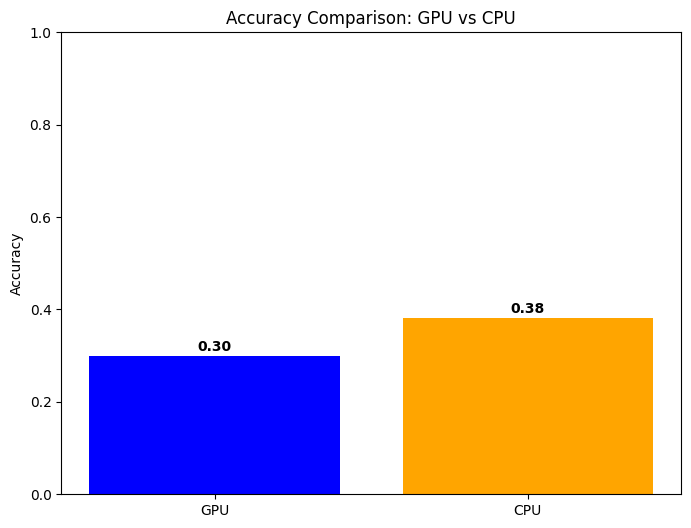

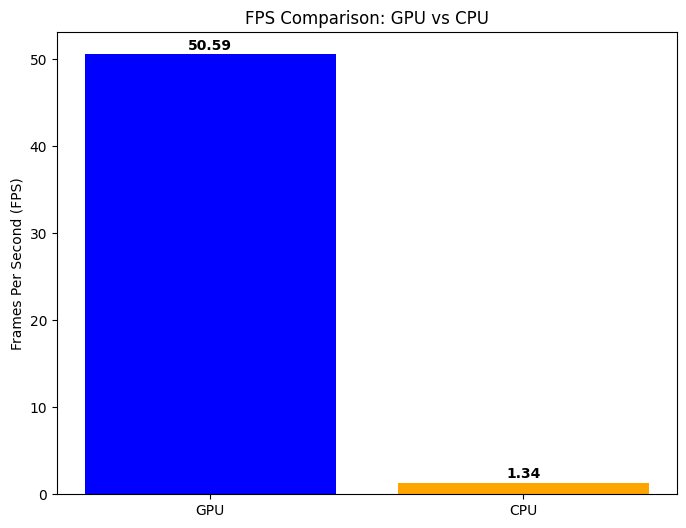

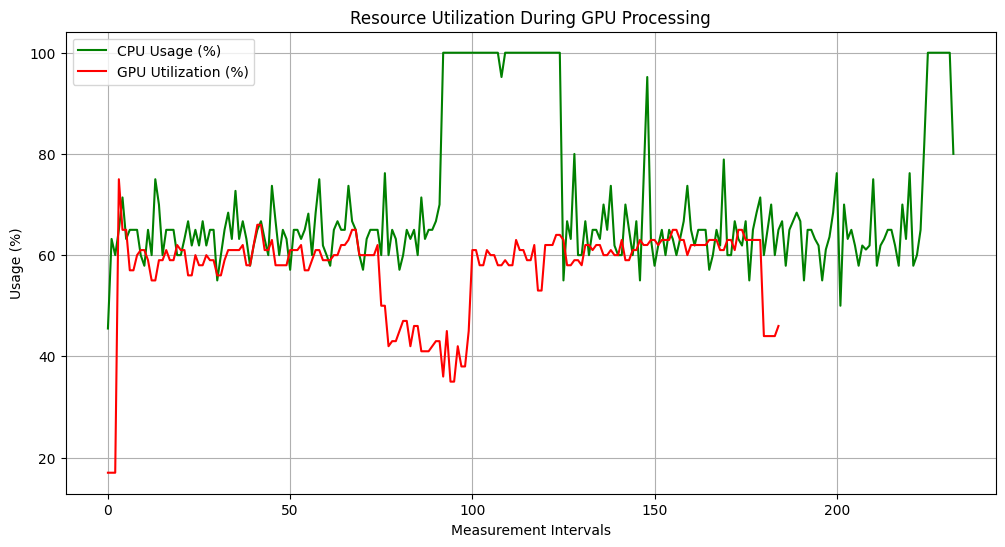

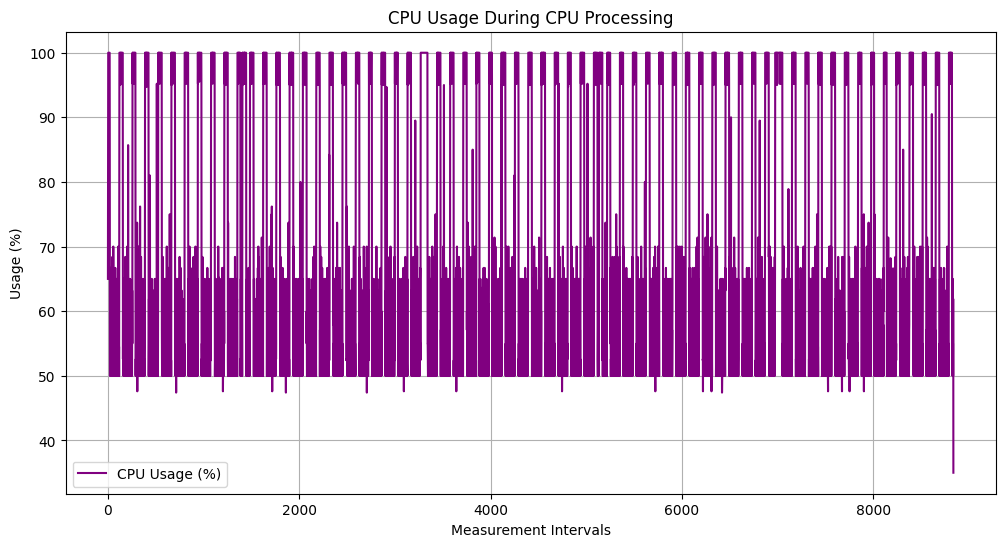


Annotated videos have been saved as:
- GPU Annotated Video: output_gpu.mp4
- CPU Annotated Video: output_cpu.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def main():
    # Path to your video file
    video_path = video_filename  # From the uploaded file

    # Output paths for annotated videos
    output_gpu_video_path = "output_gpu.mp4"
    output_cpu_video_path = "output_cpu.mp4"

    # Ensure the video file exists
    if not os.path.exists(video_path):
        print(f"Video file {video_path} does not exist. Please upload the video to the specified path.")
        return

    # Devices to process on
    devices = []
    if torch.cuda.is_available():
        devices.append(torch.device('cuda'))
    devices.append(torch.device('cpu'))

    # Dictionary to store results
    results = {}

    for device in devices:
        print(f"\nProcessing on device: {device.type.upper()}")
        output_video = output_gpu_video_path if device.type == 'cuda' else output_cpu_video_path
        try:
            predicted, acc, fps, cpu_usage, gpu_usage = process_video(device, video_path, ground_truth_labels, output_video)
            results[device.type] = {
                'predicted_labels': predicted,
                'accuracy': acc,
                'fps': fps,
                'cpu_usage': cpu_usage,
                'gpu_usage': gpu_usage
            }
        except Exception as e:
            print(f"An error occurred while processing on {device.type.upper()}: {e}")

    # Comparison of GPU vs CPU
    if 'cuda' in results and 'cpu' in results:
        gpu_acc = results['cuda']['accuracy']
        cpu_acc = results['cpu']['accuracy']
        gpu_fps = results['cuda']['fps']
        cpu_fps = results['cpu']['fps']

        # Plot Accuracy Comparison
        plt.figure(figsize=(8, 6))
        devices_to_plot = ['GPU', 'CPU']
        accuracies = [gpu_acc, cpu_acc]
        plt.bar(devices_to_plot, accuracies, color=['blue', 'orange'])
        plt.title('Accuracy Comparison: GPU vs CPU')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        for i, v in enumerate(accuracies):
            plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
        plt.show()

        # Plot FPS Comparison
        plt.figure(figsize=(8, 6))
        fps_values = [gpu_fps, cpu_fps]
        plt.bar(devices_to_plot, fps_values, color=['blue', 'orange'])
        plt.title('FPS Comparison: GPU vs CPU')
        plt.ylabel('Frames Per Second (FPS)')
        for i, v in enumerate(fps_values):
            plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
        plt.show()

        # Plot CPU and GPU Usage over Time (if GPU was used)
        if results['cuda']['gpu_usage']:
            plt.figure(figsize=(12, 6))
            plt.plot(results['cuda']['cpu_usage'], label="CPU Usage (%)", color='green')
            plt.plot(results['cuda']['gpu_usage'], label="GPU Utilization (%)", color='red')
            plt.title("Resource Utilization During GPU Processing")
            plt.xlabel("Measurement Intervals")
            plt.ylabel("Usage (%)")
            plt.legend()
            plt.grid(True)
            plt.show()

        # Plot CPU Usage for CPU Processing
        plt.figure(figsize=(12, 6))
        plt.plot(results['cpu']['cpu_usage'], label="CPU Usage (%)", color='purple')
        plt.title("CPU Usage During CPU Processing")
        plt.xlabel("Measurement Intervals")
        plt.ylabel("Usage (%)")
        plt.legend()
        plt.grid(True)
        plt.show()

    else:
        print("GPU processing was not performed or encountered an error. Only CPU results are available.")

    # Inform the user about annotated videos
    print("\nAnnotated videos have been saved as:")
    if torch.cuda.is_available():
        print(f"- GPU Annotated Video: {output_gpu_video_path}")
    print(f"- CPU Annotated Video: {output_cpu_video_path}")

    # Optional: Download the annotated videos
    if torch.cuda.is_available():
        files.download(output_gpu_video_path)
    files.download(output_cpu_video_path)

    # Optional: Save the comparison plots
    # Uncomment the following lines to save the plots as images
    """
    if 'cuda' in results and 'cpu' in results:
        # Save Accuracy Plot
        plt.figure(figsize=(8, 6))
        devices_to_plot = ['GPU', 'CPU']
        accuracies = [gpu_acc, cpu_acc]
        plt.bar(devices_to_plot, accuracies, color=['blue', 'orange'])
        plt.title('Accuracy Comparison: GPU vs CPU')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        for i, v in enumerate(accuracies):
            plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
        plt.savefig("accuracy_comparison.png")
        plt.close()

        # Save FPS Plot
        plt.figure(figsize=(8, 6))
        fps_values = [gpu_fps, cpu_fps]
        plt.bar(devices_to_plot, fps_values, color=['blue', 'orange'])
        plt.title('FPS Comparison: GPU vs CPU')
        plt.ylabel('Frames Per Second (FPS)')
        for i, v in enumerate(fps_values):
            plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')
        plt.savefig("fps_comparison.png")
        plt.close()
    """

# Execute the main function
main()


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Saving bottle-detection.mp4 to bottle-detection (2).mp4
Uploaded video file: bottle-detection (2).mp4

Processing on CPU...
Frame: 10, Predicted: 0, FPS: 1.56, CPU Usage: 100.0%

Total Frames Processed: 11, Accuracy: 0.30, FPS: 1.71


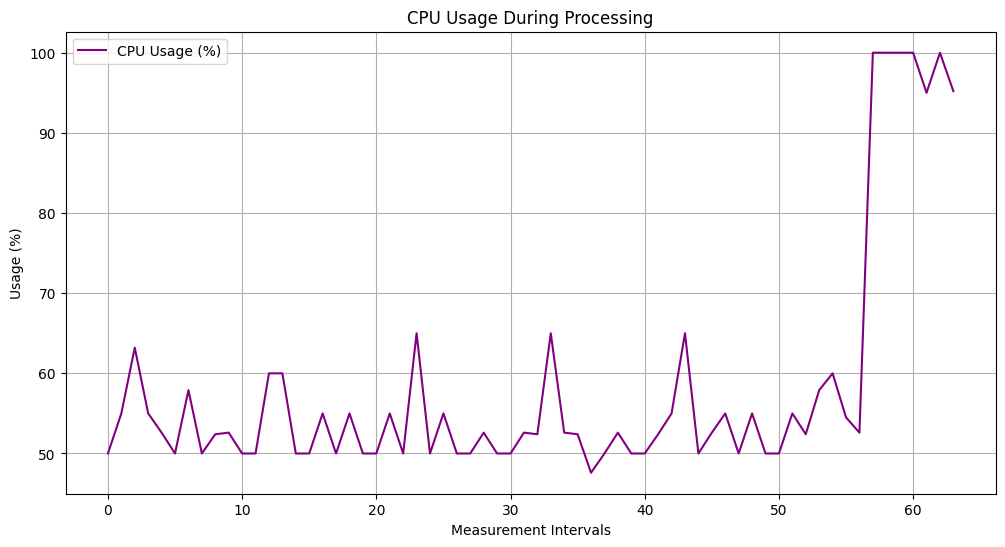


Annotated video saved as: output_cpu_optimized.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import torch
import time
import psutil
import numpy as np
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from sklearn.metrics import accuracy_score
import threading
import matplotlib.pyplot as plt
from google.colab import files

# Upload video file
uploaded = files.upload()
video_filename = list(uploaded.keys())[0]
print(f"Uploaded video file: {video_filename}")

# Model initialization
model_name = "google/vit-base-patch16-224-in21k"
model = AutoModelForImageClassification.from_pretrained(model_name).eval()
extractor = AutoFeatureExtractor.from_pretrained(model_name)

def track_cpu_usage(interval=0.1, usage_list=None, stop_event=None):
    """Tracks CPU usage at specified intervals."""
    while not stop_event.is_set():
        cpu = psutil.cpu_percent(interval=interval)
        usage_list.append(cpu)

def process_video_cpu(video_path, ground_truth_labels, output_video_path):
    """Processes video using CPU, tracks performance metrics, and saves annotated video."""

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video file {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    predicted_labels = []
    frame_count = 0

    # Track CPU usage
    cpu_usage = []
    stop_event = threading.Event()
    cpu_thread = threading.Thread(target=track_cpu_usage, args=(0.1, cpu_usage, stop_event))
    cpu_thread.start()

    start_time = time.time()

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1

        if frame_count > len(ground_truth_labels):
            break

        # Preprocess frame
        input_data = extractor(frame, return_tensors="pt")

        # Model inference
        with torch.no_grad():
            outputs = model(**input_data)

        predicted_label = outputs.logits.argmax(dim=-1).item()
        predicted_labels.append(predicted_label)

        # Annotate frame with prediction
        label_text = f"Predicted: {predicted_label}"
        cv2.putText(frame, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 255, 0), 2, cv2.LINE_AA)

        out.write(frame)

        # Print status every 10 frames
        if frame_count % 10 == 0 or frame_count == len(ground_truth_labels):
            elapsed_time = time.time() - start_time
            current_fps = frame_count / elapsed_time if elapsed_time > 0 else 0
            current_cpu = cpu_usage[-1] if cpu_usage else 0
            print(f"Frame: {frame_count}, Predicted: {predicted_label}, FPS: {current_fps:.2f}, CPU Usage: {current_cpu}%")

    stop_event.set()
    cpu_thread.join()

    cap.release()
    out.release()

    # Calculate accuracy
    accuracy = accuracy_score(ground_truth_labels[:frame_count], predicted_labels)

    total_time = time.time() - start_time
    fps_calculated = frame_count / total_time if total_time > 0 else 0

    print(f"\nTotal Frames Processed: {frame_count}, Accuracy: {accuracy:.2f}, FPS: {fps_calculated:.2f}")

    return predicted_labels, accuracy, fps_calculated, cpu_usage

def main():
    video_path = video_filename  # Uploaded video file
    output_cpu_video_path = "output_cpu_optimized.mp4"

    ground_truth_labels = [
        0, 1, 2, 1, 0, 1, 2, 1, 0, 2,  # Example labels; replace with actual ground truth labels
        # Extend the list to match the total number of frames
    ]

    print("\nProcessing on CPU...")
    predicted, acc, fps, cpu_usage = process_video_cpu(video_path, ground_truth_labels, output_cpu_video_path)

    # Plot CPU usage
    plt.figure(figsize=(12, 6))
    plt.plot(cpu_usage, label="CPU Usage (%)", color='purple')
    plt.title("CPU Usage During Processing")
    plt.xlabel("Measurement Intervals")
    plt.ylabel("Usage (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nAnnotated video saved as: {output_cpu_video_path}")
    files.download(output_cpu_video_path)

# Execute the main function
main()
